# 0. Libraries and Datasets

## 0.1. Import Libraries

In [15]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import xgboost           as xgb
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.core.display import display, HTML



%matplotlib inline
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:80% !important; }</style>"))

## 0.2. Importing Datasets

In [285]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 1. Data Understanding

## 1.1. Datasets Dimensions

In [286]:
df1 = train.copy()

In [287]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [288]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [289]:
print('Train Dataset\n\nRows: {}\nCols: {}\n_____________________\n\nTest Dataset\n\nRows: {}\nCols: {}'.format(df1.shape[0], df1.shape[1], test.shape[0], test.shape[1]))

Train Dataset

Rows: 891
Cols: 12
_____________________

Test Dataset

Rows: 418
Cols: 11


## 1.2. Dataset dtypes

In [290]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [291]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 1.3. Checking Missing Values

In [292]:
df1.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [293]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

## 1.4. Dealing with missing values

In [294]:
df1['Age'].fillna(train['Age'].median(), inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

In [296]:
df1.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [297]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [298]:
df1 = df1[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]

In [299]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [301]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [302]:
test = test[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]

In [303]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [304]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 1.5. Changing Dtypes

In [305]:
df1['Age'] = df1['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

In [306]:
df1['Age'].dtypes

dtype('int32')

In [307]:
test['Age'].dtypes

dtype('int32')

# 2. Feature Engineering

In [308]:
df2 = df1.copy()

In [309]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


## 2.1. Hypothesis

**1.** Young passenger can have more chances to survived.

**2.** Passengers who get a higher class can have more chances to survived.

**3.** How expense the Fare was, the better chance to survive is.

**4.** How bigger the family of parents with the passengers, low chances they have to survived.

## 2.2. Feature Engineering

In [310]:
df2['Family_Size'] = df2['SibSp'] + df2['Parch']
df2['Fare_Per_Person'] = df2['Fare'] / (df2['Family_Size']+1)
df2['Embarked'] = df2['Embarked'].apply(lambda x: 'Cherbourg' if x == 'C' else 'Queenstown' if x == 'Q' else 'Southampton')

group_age = []
for i in df2['Age']:
    if i < 11:
        group_age.append('Child')
    elif i >=11 and i <= 17:
        group_age.append('Teenager')
    elif i >=18 and i <=44:
        group_age.append('Adult')
    else:
        group_age.append('Elderly')

df2['Group_Age'] = group_age


test['Family_Size'] = test['SibSp'] + test['Parch']
test['Fare_Per_Person'] = test['Fare'] / (test['Family_Size'])
test['Embarked'] = test['Embarked'].apply(lambda x: 'Cherbourg' if x == 'C' else 'Queenstown' if x == 'Q' else 'Southampton')

group_age_test = []
for i in test['Age']:
    if i < 11:
        group_age_test.append('Child')
    elif i >=11 and i <= 17:
        group_age_test.append('Teenager')
    elif i >=18 and i <=44:
        group_age_test.append('Adult')
    else:
        group_age_test.append('Elderly')
test['Group_Age'] = group_age_test

In [311]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_Size', 'Fare_Per_Person',
       'Group_Age'],
      dtype='object')

In [312]:
df2 = df2[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_Size', 'Fare_Per_Person',
       'Group_Age', 'Survived']]

# 3. Exploration Data Analysis

In [315]:
df3 = df2.copy()

In [316]:
df3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Fare_Per_Person,Group_Age,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Southampton,1,3.62500,Adult,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Cherbourg,1,35.64165,Adult,1
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Southampton,0,7.92500,Adult,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Southampton,1,26.55000,Adult,1
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Southampton,0,8.05000,Adult,0


**1.** Young passenger can have more chances to survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

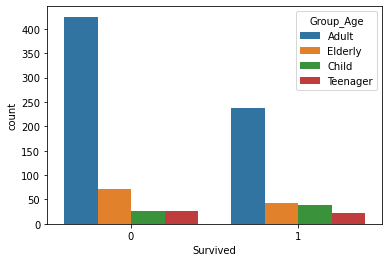

In [317]:
sns.countplot(df3['Survived'], hue='Group_Age', data=df3)